In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
%matplotlib inline 

In [19]:
train_activity = pd.read_csv('C:\Users\Spyro\Desktop\samtrain.csv')

In [20]:
train_activity.drop('Unnamed: 0', axis=1, inplace=True)

In [21]:
train_activity.head()

,tAccMean,tAccStd,tJerkMean,tJerkSD,tGyroMean,tGyroSD,tGyroJerkMean,tGyroJerkMagSD,fAccMean,fAccSD,...,fGyroJerkKurtosis,angleAccGravity,angleJerkGravity,angleGyroGravity,angleGyroJerkGravity,angleXGravity,angleYGravity,angleZGravity,subject,activity
0,-0.959434,-0.950551,-0.993306,-0.994336,-0.968959,-0.964335,-0.994248,-0.991368,-0.952155,-0.956134,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,standing
1,-0.979289,-0.976057,-0.991253,-0.991694,-0.980683,-0.983754,-0.995123,-0.996102,-0.980857,-0.975866,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,standing
2,-0.983703,-0.988020,-0.988531,-0.990397,-0.976317,-0.986051,-0.993403,-0.995091,-0.987795,-0.989015,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,standing
3,-0.986542,-0.986421,-0.993078,-0.993381,-0.982060,-0.987351,-0.995502,-0.995267,-0.987519,-0.986742,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,standing
4,-0.992827,-0.991275,-0.993480,-0.995854,-0.985204,-0.989063,-0.995808,-0.995258,-0.993591,-0.990063,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,standing


In [22]:
train_activity.columns

Index([u'tAccMean', u'tAccStd', u'tJerkMean', u'tJerkSD', u'tGyroMean',
       u'tGyroSD', u'tGyroJerkMean', u'tGyroJerkMagSD', u'fAccMean', u'fAccSD',
       u'fAccMeanFreq', u'fJerkMean', u'fJerkSD', u'fJerkMeanFreq',
       u'fGyroMean', u'fGyroSD', u'fGyroMeanFreq', u'fGyroJerkMean',
       u'fGyroJerkSD', u'fGyroJerkMeanFreq', u'fAccSkewness', u'fJerkSkewness',
       u'fGyroSkewness', u'fGyroJerkSkewness', u'fAccKurtosis',
       u'fJerkKurtosis', u'fGyroKurtosis', u'fGyroJerkKurtosis',
       u'angleAccGravity', u'angleJerkGravity', u'angleGyroGravity',
       u'angleGyroJerkGravity', u'angleXGravity', u'angleYGravity',
       u'angleZGravity', u'subject', u'activity'],
      dtype='object')

In [23]:
column_names = list(train_activity.columns)

In [24]:
print(column_names)

['tAccMean', 'tAccStd', 'tJerkMean', 'tJerkSD', 'tGyroMean', 'tGyroSD', 'tGyroJerkMean', 'tGyroJerkMagSD', 'fAccMean', 'fAccSD', 'fAccMeanFreq', 'fJerkMean', 'fJerkSD', 'fJerkMeanFreq', 'fGyroMean', 'fGyroSD', 'fGyroMeanFreq', 'fGyroJerkMean', 'fGyroJerkSD', 'fGyroJerkMeanFreq', 'fAccSkewness', 'fJerkSkewness', 'fGyroSkewness', 'fGyroJerkSkewness', 'fAccKurtosis', 'fJerkKurtosis', 'fGyroKurtosis', 'fGyroJerkKurtosis', 'angleAccGravity', 'angleJerkGravity', 'angleGyroGravity', 'angleGyroJerkGravity', 'angleXGravity', 'angleYGravity', 'angleZGravity', 'subject', 'activity']


In [25]:
column_names = column_names[0:36]

In [26]:
print(column_names)

['tAccMean', 'tAccStd', 'tJerkMean', 'tJerkSD', 'tGyroMean', 'tGyroSD', 'tGyroJerkMean', 'tGyroJerkMagSD', 'fAccMean', 'fAccSD', 'fAccMeanFreq', 'fJerkMean', 'fJerkSD', 'fJerkMeanFreq', 'fGyroMean', 'fGyroSD', 'fGyroMeanFreq', 'fGyroJerkMean', 'fGyroJerkSD', 'fGyroJerkMeanFreq', 'fAccSkewness', 'fJerkSkewness', 'fGyroSkewness', 'fGyroJerkSkewness', 'fAccKurtosis', 'fJerkKurtosis', 'fGyroKurtosis', 'fGyroJerkKurtosis', 'angleAccGravity', 'angleJerkGravity', 'angleGyroGravity', 'angleGyroJerkGravity', 'angleXGravity', 'angleYGravity', 'angleZGravity', 'subject']


In [27]:
train_features = train_activity[column_names]

In [28]:
train_features.head()

,tAccMean,tAccStd,tJerkMean,tJerkSD,tGyroMean,tGyroSD,tGyroJerkMean,tGyroJerkMagSD,fAccMean,fAccSD,...,fGyroKurtosis,fGyroJerkKurtosis,angleAccGravity,angleJerkGravity,angleGyroGravity,angleGyroJerkGravity,angleXGravity,angleYGravity,angleZGravity,subject
0,-0.959434,-0.950551,-0.993306,-0.994336,-0.968959,-0.964335,-0.994248,-0.991368,-0.952155,-0.956134,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,-0.979289,-0.976057,-0.991253,-0.991694,-0.980683,-0.983754,-0.995123,-0.996102,-0.980857,-0.975866,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,-0.983703,-0.988020,-0.988531,-0.990397,-0.976317,-0.986051,-0.993403,-0.995091,-0.987795,-0.989015,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,-0.986542,-0.986421,-0.993078,-0.993381,-0.982060,-0.987351,-0.995502,-0.995267,-0.987519,-0.986742,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,-0.992827,-0.991275,-0.993480,-0.995854,-0.985204,-0.989063,-0.995808,-0.995258,-0.993591,-0.990063,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1


In [33]:
trainInput = train_features.as_matrix()

In [34]:
targets = np.array(list(train_activity['activity']))

In [31]:
print(targets)

['standing' 'standing' 'standing' ..., 'walkup' 'walkup' 'walkup']


In [35]:
print(trainInput)

[[-0.95943388 -0.9505515  -0.99330586 ...,  0.17994061 -0.05862692  1.        ]
 [-0.97928915 -0.97605707 -0.99125349 ...,  0.18028889 -0.05431672  1.        ]
 [-0.98370313 -0.98801962 -0.98853127 ...,  0.18063731 -0.04911782  1.        ]
 ..., 
 [ 0.12493587  0.02490748 -0.07111665 ...,  0.36709423  0.07119813  6.        ]
 [ 0.02875579 -0.18849807 -0.13841649 ...,  0.37541279  0.069668    6.        ]
 [-0.03876885 -0.15394991 -0.24326344 ...,  0.35106945  0.04502535  6.        ]]


In [64]:
rf = RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=4) # initialize
rf.fit(trainInput, targets) # fit the data to the algorithm

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
test_activity = pd.read_csv('C:\Users\Spyro\Desktop\samtest.csv')

In [40]:
column_names_test = list(test_activity.columns)

In [41]:
print(column_names_test)

['Unnamed: 0', 'tAccMean', 'tAccStd', 'tJerkMean', 'tJerkSD', 'tGyroMean', 'tGyroSD', 'tGyroJerkMean', 'tGyroJerkMagSD', 'fAccMean', 'fAccSD', 'fAccMeanFreq', 'fJerkMean', 'fJerkSD', 'fJerkMeanFreq', 'fGyroMean', 'fGyroSD', 'fGyroMeanFreq', 'fGyroJerkMean', 'fGyroJerkSD', 'fGyroJerkMeanFreq', 'fAccSkewness', 'fJerkSkewness', 'fGyroSkewness', 'fGyroJerkSkewness', 'fAccKurtosis', 'fJerkKurtosis', 'fGyroKurtosis', 'fGyroJerkKurtosis', 'angleAccGravity', 'angleJerkGravity', 'angleGyroGravity', 'angleGyroJerkGravity', 'angleXGravity', 'angleYGravity', 'angleZGravity', 'subject', 'activity']


In [42]:
column_names_test = column_names_test[0:36]

In [44]:
test_features = test_activity[column_names_test]

In [45]:
testInput = test_features.as_matrix()

In [65]:
results = rf.predict(testInput)

In [50]:
targetFinal = np.array(test_activity['activity'].tolist())

In [51]:
print(results)

['laying' 'laying' 'laying' ..., 'laying' 'walkup' 'walkup']


In [52]:
print(targetFinal)

['standing' 'standing' 'standing' ..., 'walkup' 'walkup' 'walkup']


In [53]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(results, targetFinal)

0.30437710437710436

In [57]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(results, targetFinal)

array([[162, 221, 271, 120, 129, 125],
       [ 33,  43,  12,   0,   0,   0],
       [ 95,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,  53,   4],
       [  3,   0,   0, 108,  18,  87]])

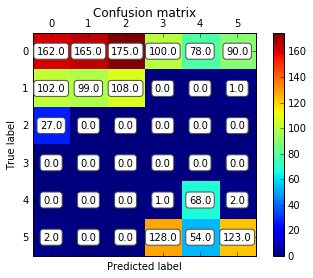

In [67]:
cm = confusion_matrix(results, targetFinal)
fig, ax = plt.subplots()
im = ax.matshow(cm)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
plt.title('Confusion matrix')
fig.colorbar(im)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()